In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/home/ci411/volume_estimation')
import eval_funcs
import model_funcs
import pandas as pd
import torch
from IPython.display import IFrame
from tqdm import tqdm
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


Using device: cpu

Using device: cpu


Test Metrics
Validation Metrics
Train Metrics


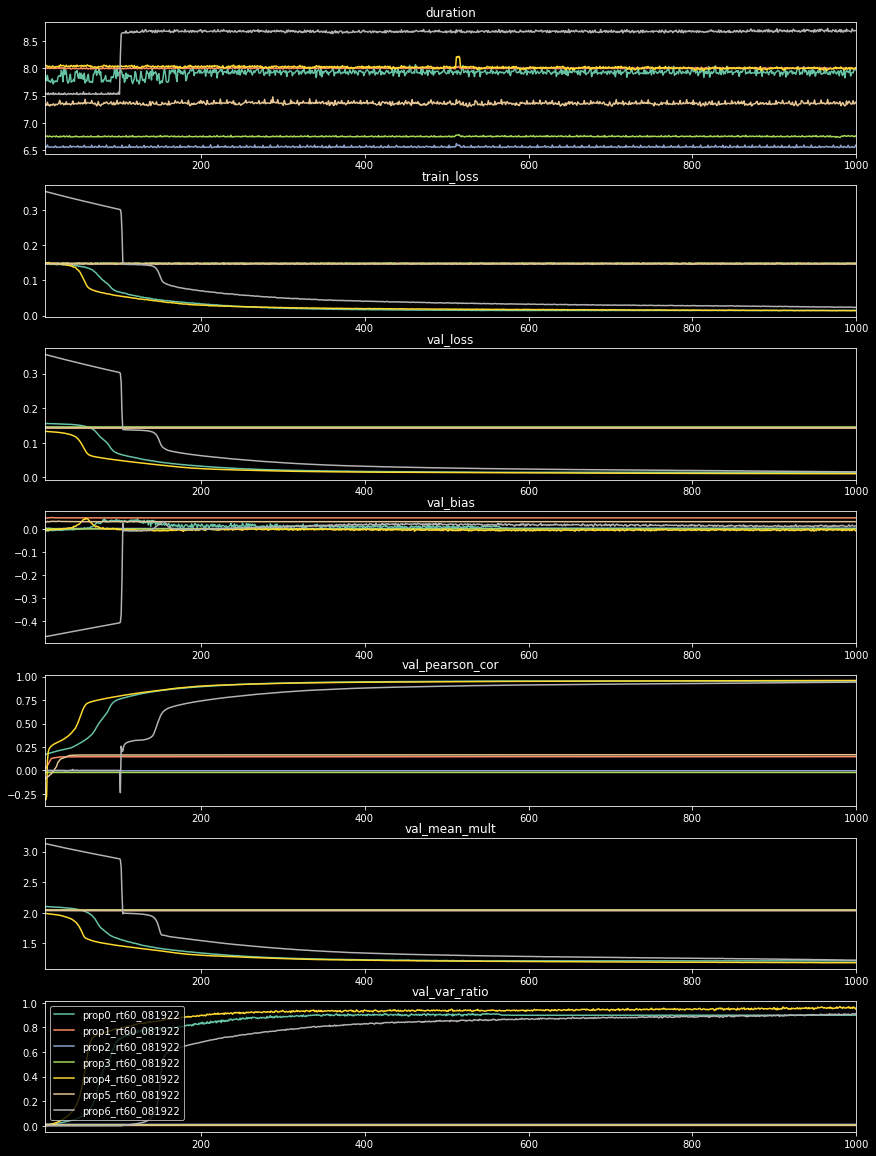

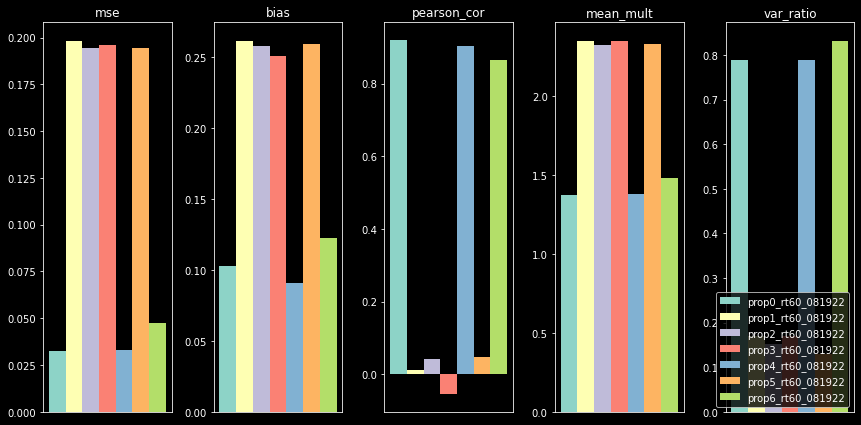

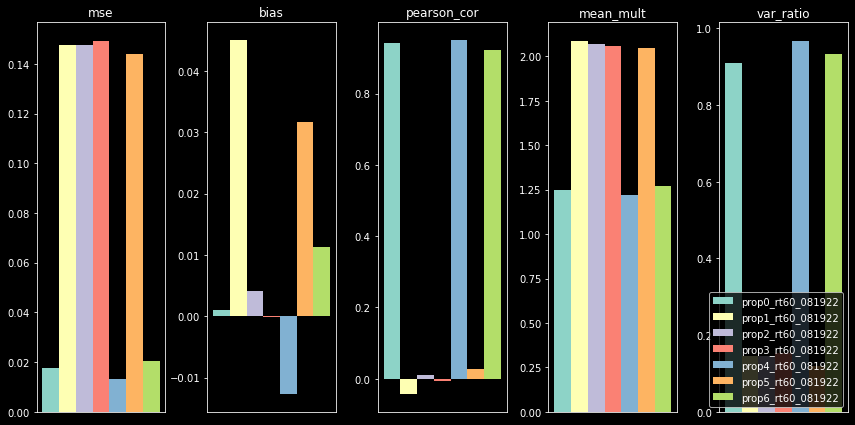

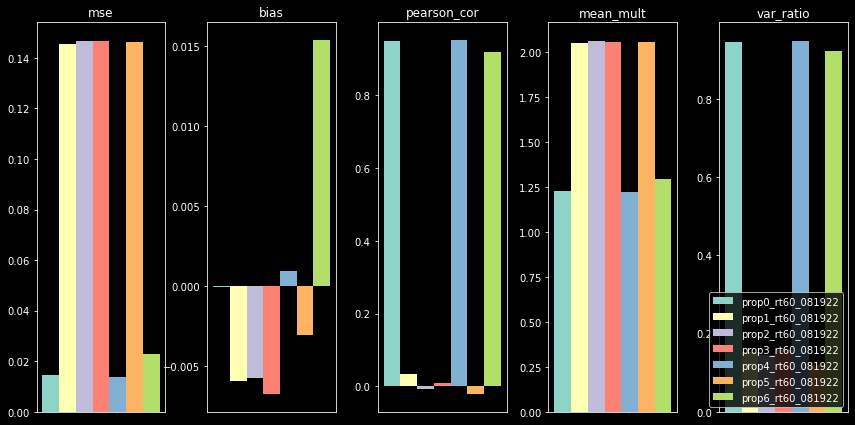

In [6]:
experiment_name = '081922_rt60_comp'
plt.style.use('dark_background')

fig_curves = eval_funcs.plot_experiment_curves(experiment_name, offset=10, cmap='Set2',\
                                               max_len=1000, verbose=False)

print("Test Metrics")
test_metrics = eval_funcs.plot_experiment_metrics(experiment_name, split='test')

print("Validation Metrics")
val_metrics = eval_funcs.plot_experiment_metrics(experiment_name, split='val')

print("Train Metrics")
train_metrics = eval_funcs.plot_experiment_metrics(experiment_name, split='train')


Model:prop0_rt60_081922	 Metric:mse	 Val:0.017597076170465544
Model:prop0_rt60_081922	 Metric:bias	 Val:0.0009574485104641959
Model:prop0_rt60_081922	 Metric:pearson_cor	 Val:0.942486464817816
Model:prop0_rt60_081922	 Metric:mean_mult	 Val:1.2496250401697846
Model:prop0_rt60_081922	 Metric:var_ratio	 Val:0.9102655870419484
Model:prop4_rt60_081922	 Metric:mse	 Val:0.013135550401412628
Model:prop4_rt60_081922	 Metric:bias	 Val:-0.01270307505822183
Model:prop4_rt60_081922	 Metric:pearson_cor	 Val:0.9499204090143925
Model:prop4_rt60_081922	 Metric:mean_mult	 Val:1.220326212092088
Model:prop4_rt60_081922	 Metric:var_ratio	 Val:0.9674653523401788
Model:prop6_rt60_081922	 Metric:mse	 Val:0.020515316958266895
Model:prop6_rt60_081922	 Metric:bias	 Val:0.011272737829862156
Model:prop6_rt60_081922	 Metric:pearson_cor	 Val:0.9232672849906695
Model:prop6_rt60_081922	 Metric:mean_mult	 Val:1.271953390934392
Model:prop6_rt60_081922	 Metric:var_ratio	 Val:0.9333939270104471


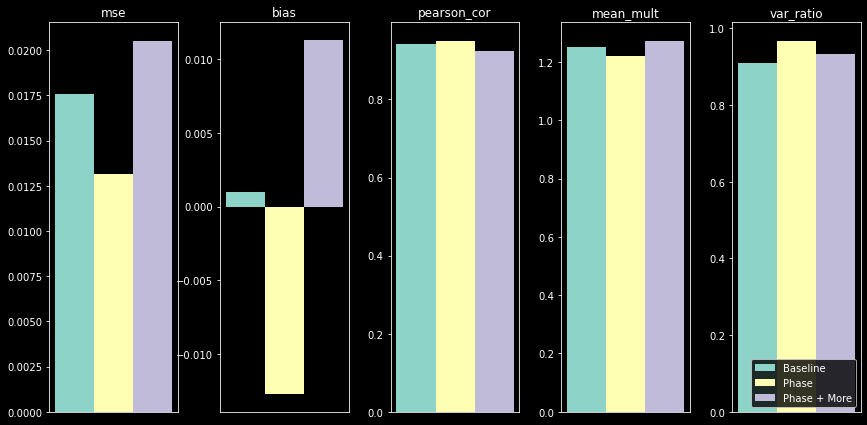

In [8]:
MODELS_DIR = '/scratch/ci411/sonos_rirs/models/'
import json
def plot_experiment_metrics(experiment_name, model_names=None, split='test'):
    experiment_dir = os.path.join(MODELS_DIR, experiment_name)
    
    if model_names is None:
        model_names = os.listdir(experiment_dir)
        model_names.sort()
            
    n = len(model_names)
    width = 0.5/n
    
    fig, axs = plt.subplots(1,5, figsize=(12,6))
    fig.tight_layout()

    for i, model in enumerate(model_names):
        json_metric = os.path.join(experiment_dir, model, '{}_metrics.json'.format(split))
        if os.path.exists(json_metric):
            with open(json_metric) as f:
                metric_dict = json.load(f)
        else:
            print("No metric file at {}".format(json_metric))
            continue
        
        offset = i/(2*n) - 0.25
        for j, (key, val) in enumerate(metric_dict.items()):
            axs[j].bar(offset, val, width, label=model)
            axs[j].set_title(key)
            axs[j].set_xticks([])
            print("Model:{}\t Metric:{}\t Val:{}".format(model, key, val))
    #plt.legend(loc='lower right')
    return fig
model_names = ['prop0_rt60_081922', 'prop4_rt60_081922','prop6_rt60_081922']
val_metrics = plot_experiment_metrics(experiment_name, model_names=model_names, split='val')

plt.legend(labels=['Baseline', 'Phase', "Phase + More"], loc='lower right')

In [ ]:
experiment_name = '081922_rt60_comp'
model_list = ['prop{}_rt60_081922'.format(i) for i in [0,1,2,3,4,5,6]]
print(model_list)
eval_funcs.evaluate_experiment(experiment_name, model_list=model_list, log=True, same_features=False, gen_plots=True, target='rt60')

['prop0_rt60_081922', 'prop1_rt60_081922', 'prop2_rt60_081922', 'prop3_rt60_081922', 'prop4_rt60_081922', 'prop5_rt60_081922', 'prop6_rt60_081922']
Loading prop0_rt60_081922
Loading features from /scratch/ci411/sonos_rirs/features/081522_20k/081822_20k_prop0/feature_df.csv
labels
Computing metrics on prop0_rt60_081922
Loading test dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop0_rt60_081922/test_metrics.json
Loading val dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop0_rt60_081922/test_metrics.json
Loading train dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop0_rt60_081922/train_metrics.json
Generating confusion matrices...


100%|██████████| 770/770 [00:40<00:00, 18.96it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop0_rt60_081922/test_cm.pdf


100%|██████████| 520/520 [00:12<00:00, 41.26it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop0_rt60_081922/val_cm.pdf


100%|██████████| 4684/4684 [03:22<00:00, 23.14it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop0_rt60_081922/train_cm.pdf
Loading prop1_rt60_081922
Loading features from /scratch/ci411/sonos_rirs/features/081522_20k/081822_20k_prop1/feature_df.csv
labels
Computing metrics on prop1_rt60_081922
Loading test dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop1_rt60_081922/test_metrics.json
Loading val dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop1_rt60_081922/test_metrics.json
Loading train dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop1_rt60_081922/train_metrics.json
Generating confusion matrices...


100%|██████████| 770/770 [00:26<00:00, 29.40it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop1_rt60_081922/test_cm.pdf


100%|██████████| 520/520 [00:13<00:00, 37.97it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop1_rt60_081922/val_cm.pdf


100%|██████████| 4684/4684 [02:41<00:00, 28.96it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop1_rt60_081922/train_cm.pdf
Loading prop2_rt60_081922
Loading features from /scratch/ci411/sonos_rirs/features/081522_20k/081822_20k_prop2/feature_df.csv
labels
Computing metrics on prop2_rt60_081922
Loading test dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop2_rt60_081922/test_metrics.json
Loading val dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop2_rt60_081922/test_metrics.json
Loading train dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop2_rt60_081922/train_metrics.json
Generating confusion matrices...


100%|██████████| 770/770 [00:25<00:00, 30.60it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop2_rt60_081922/test_cm.pdf


100%|██████████| 520/520 [00:11<00:00, 46.72it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop2_rt60_081922/val_cm.pdf


100%|██████████| 4684/4684 [03:18<00:00, 23.55it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop2_rt60_081922/train_cm.pdf
Loading prop3_rt60_081922
Loading features from /scratch/ci411/sonos_rirs/features/081522_20k/081822_20k_prop3/feature_df.csv
labels
Computing metrics on prop3_rt60_081922
Loading test dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop3_rt60_081922/test_metrics.json
Loading val dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop3_rt60_081922/test_metrics.json
Loading train dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop3_rt60_081922/train_metrics.json
Generating confusion matrices...


100%|██████████| 770/770 [00:22<00:00, 34.61it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop3_rt60_081922/test_cm.pdf


100%|██████████| 520/520 [00:17<00:00, 29.81it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop3_rt60_081922/val_cm.pdf


100%|██████████| 4684/4684 [02:19<00:00, 33.49it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop3_rt60_081922/train_cm.pdf
Loading prop4_rt60_081922
Loading features from /scratch/ci411/sonos_rirs/features/081522_20k/081822_20k_prop4/feature_df.csv
labels
Computing metrics on prop4_rt60_081922
Loading test dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop4_rt60_081922/test_metrics.json
Loading val dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop4_rt60_081922/test_metrics.json
Loading train dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop4_rt60_081922/train_metrics.json
Generating confusion matrices...


100%|██████████| 770/770 [00:14<00:00, 53.59it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop4_rt60_081922/test_cm.pdf


100%|██████████| 520/520 [00:09<00:00, 52.87it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop4_rt60_081922/val_cm.pdf


100%|██████████| 4684/4684 [03:09<00:00, 24.70it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop4_rt60_081922/train_cm.pdf
Loading prop5_rt60_081922
Loading features from /scratch/ci411/sonos_rirs/features/081522_20k/081822_20k_prop5/feature_df.csv
labels
Computing metrics on prop5_rt60_081922
Loading test dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop5_rt60_081922/test_metrics.json
Loading val dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop5_rt60_081922/test_metrics.json
Loading train dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop5_rt60_081922/train_metrics.json
Generating confusion matrices...


100%|██████████| 770/770 [00:12<00:00, 63.00it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop5_rt60_081922/test_cm.pdf


100%|██████████| 520/520 [00:08<00:00, 63.77it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop5_rt60_081922/val_cm.pdf


100%|██████████| 4684/4684 [02:21<00:00, 33.06it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop5_rt60_081922/train_cm.pdf
Loading prop6_rt60_081922
Loading features from /scratch/ci411/sonos_rirs/features/081522_20k/081822_20k_prop6/feature_df.csv
labels
Computing metrics on prop6_rt60_081922
Loading test dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop6_rt60_081922/test_metrics.json
Loading val dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop6_rt60_081922/test_metrics.json
Loading train dataloader...
Saving metrics to /scratch/ci411/sonos_rirs/models/081922_rt60_comp/prop6_rt60_081922/train_metrics.json
Generating confusion matrices...


100%|██████████| 770/770 [00:14<00:00, 52.23it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop6_rt60_081922/test_cm.pdf


100%|██████████| 520/520 [00:09<00:00, 52.04it/s]


Plotting...
Saving fig to /home/ci411/volume_estimation/figures/081922_rt60_comp/prop6_rt60_081922/val_cm.pdf


  3%|▎         | 125/4684 [00:02<01:25, 53.32it/s]